# Introdução à Ciência de Dados e Métodos Quantitativos

Você é parte de um time de ciência de dados em um grande banco com sede
em diversos países. O gerente de relacionamentos do banco ouviu sobre
“métodos quantitativos” em um conferência e começou a pensar se essa
ferramenta poderia ajuda-lo em suas tarefas. Uma vez que o time de
relacionamentos não dispõe de analistas ciêntistas de dados eles te
convidaram para uma reunião para entender as possibilidades. Eles pediram
para você “analisar os dados” e te enviaram de antemão dois conjuntos de
dados.  

O primeiro conjunto, entitulado Retail_data.csv contém informações sobre
clientes escolhidos aleatóriamente que receberam ou não um empréstimo
ao longo dos últimos anos, além de dados adicionais sobre os clientes como
a quantidade de anos que o cliente está com o banco, estado marital, nível
de educação, status de empregabilidade, renda mensal e balanço total na
conta.  

O segundo conjunto de dados, entitulado Potential_Customers.csv contém
os mesmos dados sobre potenciais clientes exceto a informação sobre o
empréstimo. O gerente de relacionamentos gostaria de saber quais
potenciais clientes ele deveria abordar para oferecer um empréstimo.  

## 1 – Prepare um conjunto de perguntas com base nos dados para iniciar uma conversa durante a reunião. (25% da nota final)


* O que caracterizaria um bom resultado para os stakeholders?
* Quais são os critérios para definir um cliente como elegível para a hipoteca?
* Existe alguma segmentação específica dos clientes que deve ser considerada (Idade, renda, tempo com o banco)?
* Qual a tolerância ao risco do banco? Ele prefere abordar clientes com alta probabilidade de pagamento ou está disposto a oferecer crédito para clientes mais arriscados?
* O banco gostaria de evitar oferecer empréstimos para clientes que podem não pagar ou oferecer para clientes bons pagadores?
* Existe uma meta de quantidade de empréstimos a serem concedidos? Ou o foco é apenas na qualidade dos clientes selecionados?
* O impacto do estado civil ("MARTIAL_STATUS") é relevante para aprovação da hipoteca?
* O impacto do grau de escolaridade ("EDUCATION") é relevante para aprovação da hipoteca?
* O impacto do tipo de emprego ("EMPLOYEMENTE") é relevante para aprovação da hipoteca?




## 2 – Realize uma análise exploratória dos dados, indicando padrões interessantes para o cliente de relacionamentos. (25% da nota final)

### Tratamento e limpeza dos dados de Treino

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_treino = pd.read_csv('Retail_Data.csv', sep=';')
print(df_treino.head())

   Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0        1           Y                50.0   52               13   
1        9           Y                48.0   49               11   
2       11           Y                53.0   55               14   
3       12           Y                64.0   66               10   
4       18           Y                46.0   47                9   

  MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0              M       HGH        PVE      M  909,5013077   
1              M       HGH        SFE      M  288,4615385   
2              M       BCR        STE      M  1280,528692   
3              M       BCR        OTH      F  620,9597692   
4              S       MAS        PVE      F  2239,853846   

  CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0           1979-04-18       2010-01-01             2004-03-16   
1           1999-12-16       2004-01-20             2005-11-07   
2           2005-06-28    

In [ ]:
print(df_treino.dtypes)

Cocunut                     int64
Mortgage_YN                object
AGE_AT_ORIGINATION        float64
AGE                         int64
YEARS_WITH_BANK             int64
MARTIAL_STATUS             object
EDUCATION                  object
EMPLOYMENT                 object
GENDER                     object
CUST_INCOME                object
CURRENT_ADDRESS_DATE       object
CURRENT_JOB_DATE           object
CURRENT_WITH_BANK_DATE     object
CURRENT_BALANCE_EUR        object
dtype: object


In [ ]:
df_treino['CUST_INCOME'] = df_treino['CUST_INCOME'].str.replace(',', '.').astype(float)
df_treino['CURRENT_BALANCE_EUR'] = df_treino['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)

In [ ]:
df_treino['CUR_BALANCE_EUR'] = df_treino['CURRENT_BALANCE_EUR'].apply(lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

In [ ]:
print(df_treino)

       Cocunut Mortgage_YN  AGE_AT_ORIGINATION  AGE  YEARS_WITH_BANK  \
0            1           Y                50.0   52               13   
1            9           Y                48.0   49               11   
2           11           Y                53.0   55               14   
3           12           Y                64.0   66               10   
4           18           Y                46.0   47                9   
...        ...         ...                 ...  ...              ...   
23978    79979           N                 NaN   67                3   
23979    79982           N                 NaN   59               13   
23980    79983           N                 NaN   68                7   
23981    79985           N                 NaN   59                2   
23982    79998           N                 NaN   47                1   

      MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  CUST_INCOME  \
0                  M       HGH        PVE      M   909.501308   
1    

In [ ]:
df_treino.replace("*noval*", np.NaN, inplace=True)

In [ ]:
print(df_treino.isnull().sum())

Cocunut                       0
Mortgage_YN                   0
AGE_AT_ORIGINATION        23677
AGE                           0
YEARS_WITH_BANK               0
MARTIAL_STATUS               43
EDUCATION                     0
EMPLOYMENT                    0
GENDER                        0
CUST_INCOME                   0
CURRENT_ADDRESS_DATE          0
CURRENT_JOB_DATE              0
CURRENT_WITH_BANK_DATE        0
CURRENT_BALANCE_EUR           0
CUR_BALANCE_EUR               0
dtype: int64


Verificando porcentagem de valores nulos nas duas colunas

In [ ]:
print((23677 * 100) / 23983)

98.72409623483301


Por ser uma grande parte do df com valores nulos, essa coluna será excluída e não será utilizada na análise.

In [ ]:
print((43 * 100) / 23983)

0.17929366634699578


Por ser uma pequena quantidade com valores nulos, será solteiro (S)

In [ ]:
df_treino = df_treino.drop('AGE_AT_ORIGINATION', axis=1)

In [ ]:
df_treino.replace(np.nan, "S", inplace=True)

In [ ]:
print(df_treino)

       Cocunut Mortgage_YN  AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION  \
0            1           Y   52               13              M       HGH   
1            9           Y   49               11              M       HGH   
2           11           Y   55               14              M       BCR   
3           12           Y   66               10              M       BCR   
4           18           Y   47                9              S       MAS   
...        ...         ...  ...              ...            ...       ...   
23978    79979           N   67                3              M       BCR   
23979    79982           N   59               13              M       HGH   
23980    79983           N   68                7              W       PRS   
23981    79985           N   59                2              M       BCR   
23982    79998           N   47                1              M       HGH   

      EMPLOYMENT GENDER  CUST_INCOME CURRENT_ADDRESS_DATE CURRENT_JOB_DATE 

<Axes: ylabel='Mortgage_YN'>

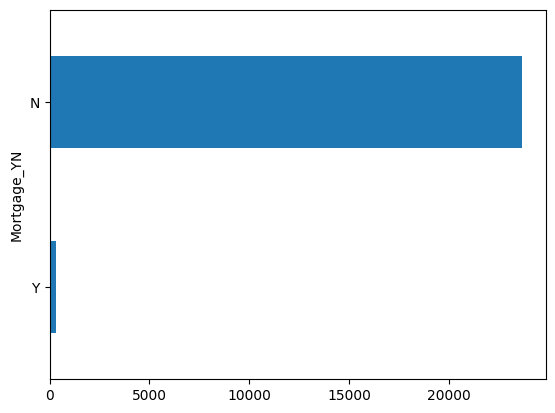

In [ ]:
df_treino.Mortgage_YN.value_counts().sort_values().plot(kind = 'barh')

<Axes: ylabel='MARTIAL_STATUS'>

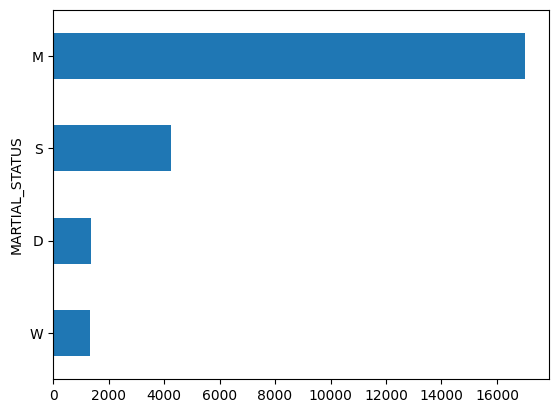

In [ ]:
df_treino.MARTIAL_STATUS.value_counts().sort_values().plot(kind = 'barh')

MARTIAL_STATUS (Status Marital)


*   M – Married (Casado)
*   S – Single (Solteiro)
*   D – Divorced (Divorciado)
*   W – Widowed (Viúvo)


<Axes: ylabel='EDUCATION'>

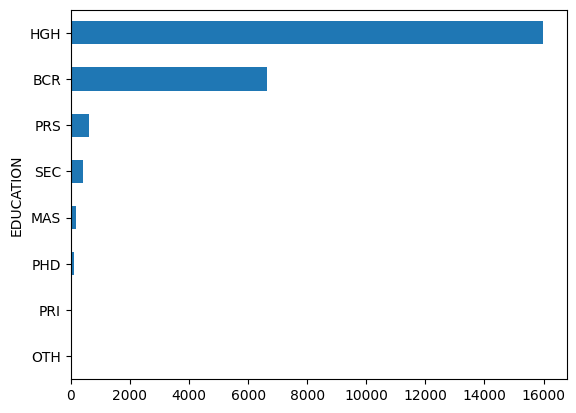

In [ ]:
df_treino.EDUCATION.value_counts().sort_values().plot(kind = 'barh')

EDUCATION (Educação)


*   HGH – High School (Ensino Médio)
*   BCR – Bachelor's (Graduação, Bacharelado)
* PRS – Post-secondary (Pós-secundário, pode ser técnico ou pré-universitário)
* SEC – Secondary (Ensino Secundário, pode ser o Ensino Médio em alguns países)
* MAS – Master's (Mestrado)
* PHD – PhD (Doutorado)
* PRI – Primary (Ensino Fundamental)
* OTH – Other (Outro)

<Axes: ylabel='EMPLOYMENT'>

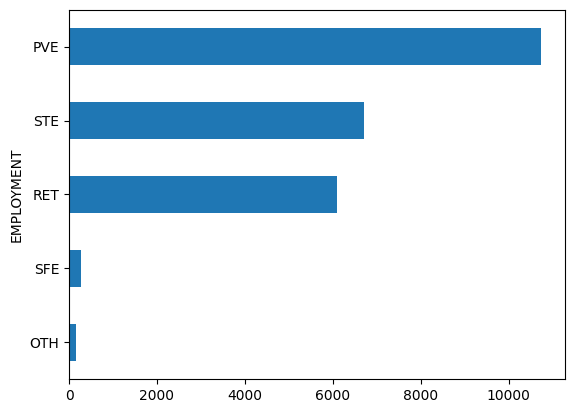

In [ ]:
df_treino.EMPLOYMENT.value_counts().sort_values().plot(kind = 'barh')

EMPLOYMENT (Emprego)
* PVE – Private Employee (Empregado no setor privado)
* STE – State Employee (Empregado público/estadual)
* RET – Retired (Aposentado)
* SFE – Self-Employed (Trabalhador autônomo)
* OTH – Other (Outro)

<Axes: ylabel='GENDER'>

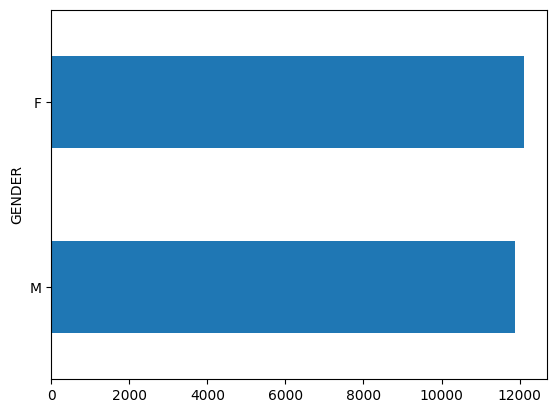

In [ ]:
df_treino.GENDER.value_counts().sort_values().plot(kind = 'barh')

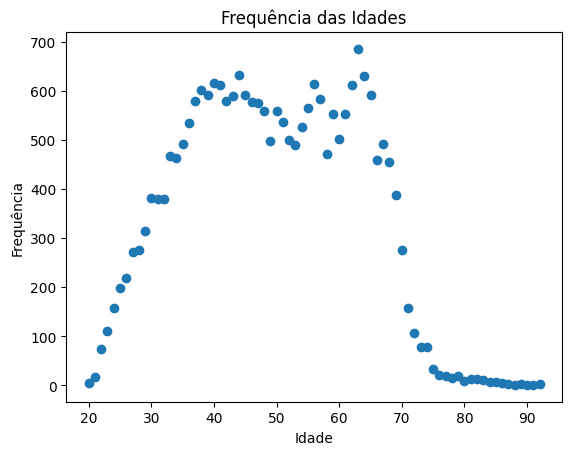

In [ ]:
age_counts = df_treino["AGE"].value_counts()
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Frequência das Idades")
plt.show()

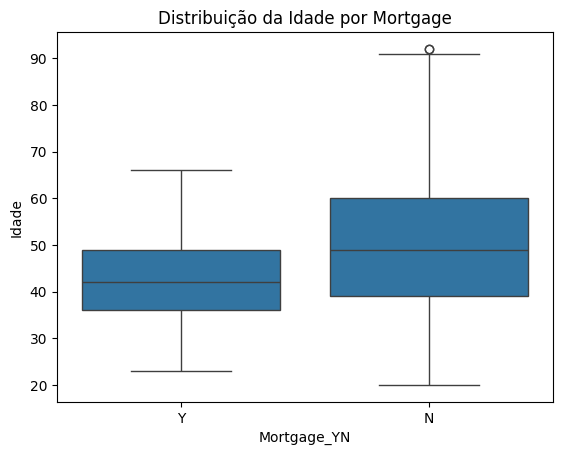

In [ ]:
sns.boxplot(x=df_treino["Mortgage_YN"], y=df_treino["AGE"])
plt.ylabel("Idade")
plt.title("Distribuição da Idade por Mortgage")
plt.show()

In [ ]:
quartis_por_grupo = df_treino.groupby("Mortgage_YN")["AGE"].describe()[["25%", "50%", "75%"]]
quartis_por_grupo.rename(columns={"25%": "Q1", "50%": "Mediana", "75%": "Q3"}, inplace=True)
print(quartis_por_grupo)

               Q1  Mediana    Q3
Mortgage_YN                     
N            39.0     49.0  60.0
Y            36.0     42.0  49.0


Mortgage (N):

*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de idade maior do que as pessoas que conseguem;
*   Tem apenas um outlier (ponto discrepante)
* Mediana: 49 anos
* Q1: 39 anos (25% dos dados estão abaixo desse valor)
* Q3: 60 anos (25% dos dados estão acima desse valor)

Mortgage (Y):
*  As pessoas que conseguem o mortgage tem uma
 variabilidade de idade menor do que as pessoas que
não conseguem;
*   Não tem outlier (ponto discrepante)
* Mediana: 42 anos
* Q1: 36 anos (25% dos dados estão abaixo desse valor)
* Q3: 49 anos (25% dos dados estão acima desse valor)

**Análise**

Isso sugere que pessoas mais jovens têm mais chances de conseguir uma hipoteca.

Pode indicar que o banco tem critérios que favorecem faixas etárias mais baixas (talvez porque têm mais tempo para pagar o financiamento).




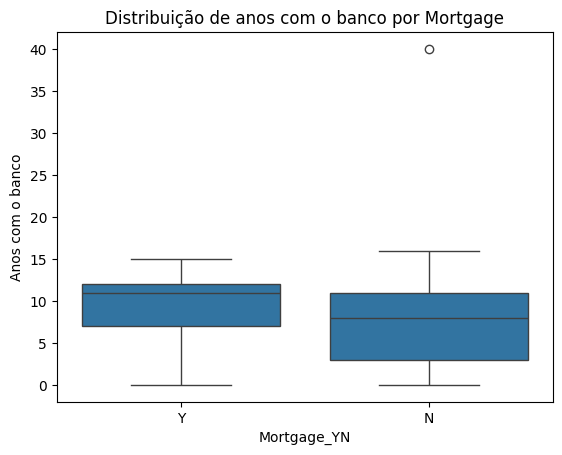

In [ ]:
sns.boxplot(x=df_treino["Mortgage_YN"], y=df_treino["YEARS_WITH_BANK"])
plt.ylabel("Anos com o banco")
plt.title("Distribuição de anos com o banco por Mortgage")
plt.show()

In [ ]:
quartis_por_grupo = df_treino.groupby("Mortgage_YN")["YEARS_WITH_BANK"].describe()[["25%", "50%", "75%"]]
quartis_por_grupo.rename(columns={"25%": "Q1", "50%": "Mediana", "75%": "Q3"}, inplace=True)
print(quartis_por_grupo)

              Q1  Mediana    Q3
Mortgage_YN                    
N            3.0      8.0  11.0
Y            7.0     11.0  12.0


Mortgage (N):

*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de anos com o banco maior do que as pessoas que conseguem;
*   Tem apenas um outlier (ponto discrepante)
* Mediana: 8 anos
* Q1: 3 anos (25% dos dados estão abaixo desse valor)
* Q3: 11 anos (25% dos dados estão acima desse valor)

Mortgage (Y):
*  As pessoas que conseguem o mortgage tem uma
 variabilidade de anos com o banco menor do que as pessoas que não conseguem;
*   Não tem outlier (ponto discrepante)
* Mediana: 8 anos
* Q1: 7 anos (25% dos dados estão abaixo desse valor)
* Q3: 11 anos (25% dos dados estão acima desse valor)

**Análise**

Isso sugere que pessoas que estão com mais tempo no banco têm mais chances de conseguir uma hipoteca.

Pode indicar que o banco tem critérios que favorecem clientes fiéis (talvez porque têm mais confiança para pagar o financiamento).


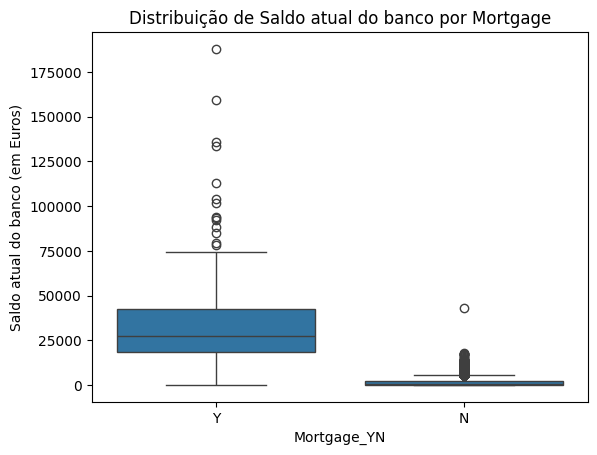

In [ ]:
sns.boxplot(x=df_treino["Mortgage_YN"], y=df_treino["CURRENT_BALANCE_EUR"])
plt.ylabel("Saldo atual do banco (em Euros)")
plt.title("Distribuição de Saldo atual do banco por Mortgage")
plt.show()

In [ ]:
quartis_por_grupo = df_treino.groupby("Mortgage_YN")["CURRENT_BALANCE_EUR"].describe()[["25%", "50%", "75%"]]
quartis_por_grupo.rename(columns={"25%": "Q1", "50%": "Mediana", "75%": "Q3"}, inplace=True)
print(quartis_por_grupo)

                       Q1       Mediana            Q3
Mortgage_YN                                          
N              104.124154    408.526154   2269.940385
Y            18594.195822  27513.812885  42345.789828


Mortgage (N):

*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de euros na conta bancária menor do que as pessoas que conseguem;
*   Tem vários outliers (pontos discrepantes)
* Mediana: 408,52 euros
* Q1: 104,12 euros (25% dos dados estão abaixo desse valor)
* Q3: 2.269,94 euros (25% dos dados estão acima desse valor)

Mortgage (Y):
*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de euros na conta bancária maior do que as pessoas que conseguem;
* Tem vários outliers (pontos discrepantes)
* Mediana: 27.513,81 euros
* Q1:  18.594,19 euros (25% dos dados estão abaixo desse valor)
* Q3: 42.345,78 euros (25% dos dados estão acima desse valor)

**Análise**

Isso sugere que pessoas que estão com mais dinheiro na conta bancária têm mais chances de conseguir uma hipoteca.

Pode indicar que o banco tem critérios que favorecem clientes com maior poder aquisitivo (talvez porque têm mais confiança para pagar o financiamento).


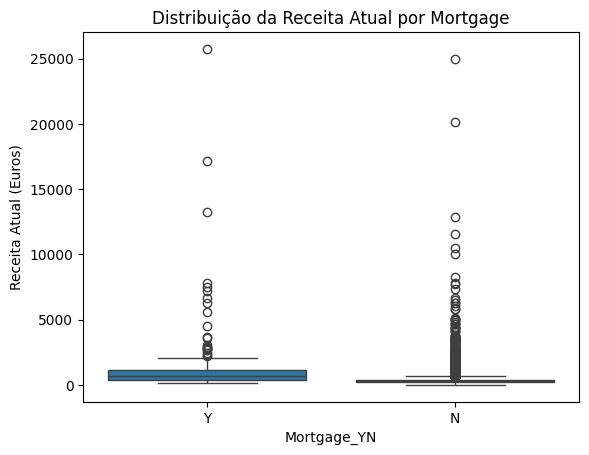

In [ ]:
sns.boxplot(x=df_treino["Mortgage_YN"], y=df_treino["CUST_INCOME"])
plt.ylabel("Receita Atual (Euros)")
plt.title("Distribuição da Receita Atual por Mortgage")
plt.show()

In [ ]:
quartis_por_grupo = df_treino.groupby("Mortgage_YN")["CUST_INCOME"].describe()[["25%", "50%", "75%"]]
quartis_por_grupo.rename(columns={"25%": "Q1", "50%": "Mediana", "75%": "Q3"}, inplace=True)
print(quartis_por_grupo)

                     Q1     Mediana           Q3
Mortgage_YN                                     
N            211.620385  285.506615   401.290000
Y            401.586923  696.556885  1111.791635


Mortgage (N):

*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de euros na renda menor do que as pessoas que conseguem;
* Tem vários outliers (pontos discrepantes)
* Mediana: 211,62 euros
* Q1: 285,5 euros (25% dos dados estão abaixo desse valor)
* Q3: 401,29 euros (25% dos dados estão acima desse valor)

Mortgage (Y):
*  As pessoas que não conseguem o mortgage tem uma
 variabilidade de euros na renda maior do que as pessoas que conseguem;
* Tem vários outliers (pontos discrepantes)
* Mediana: 401,58 euros
* Q1:  696,55 euros (25% dos dados estão abaixo desse valor)
* Q3: 1.111,79 euros (25% dos dados estão acima desse valor)

**Análise**

Isso sugere que pessoas que possuem uma renda maior têm mais chances de conseguir uma hipoteca.

Pode indicar que o banco tem critérios que favorecem clientes com maior poder aquisitivo (talvez porque têm mais confiança para pagar o financiamento).


#### Transformando os dados Categóricos em numéricos
**Mortgage_YN** e **GENDER** serão 0 ou 1;
* 0 = N e 1 = Y;
* 0 = M e 1 = F

**EDUCATION** serão 0 até 7;

```
education_mapping = {
    'PRI': 0,   # Ensino Fundamental
    'SEC': 1,   # Ensino Secundário
    'HGH': 2,   # Ensino Médio
    'PRS': 3,   # Pós-secundário (técnico ou pré-universitário)
    'BCR': 4,   # Bacharelado
    'MAS': 5,   # Mestrado
    'PHD': 6,   # Doutorado
    'OTH': 7    # Outros (sem hierarquia específica)
}
```
**MARTIAL_STATUS** e **EMPLOYMENT** será utilizado One-Hot Encoding



In [ ]:
education_mapping = {
    'PRI': 0,   # Ensino Fundamental
    'SEC': 1,   # Ensino Secundário
    'HGH': 2,   # Ensino Médio
    'PRS': 3,   # Pós-secundário (técnico ou pré-universitário)
    'BCR': 4,   # Bacharelado
    'MAS': 5,   # Mestrado
    'PHD': 6,   # Doutorado
    'OTH': 7    # Outros (sem hierarquia específica)
}

In [ ]:
df_treino['EDUCATION'] = df_treino['EDUCATION'].map(education_mapping)

In [ ]:
df_treino['Mortgage_YN'] = df_treino['Mortgage_YN'].map({'Y': 1, 'N': 0})
df_treino['GENDER'] = df_treino['GENDER'].map({'F': 1, 'M': 0})

In [ ]:
df_treino['MARTIAL_STATUS'].unique()

array(['M', 'S', 'D', 'W'], dtype=object)

In [ ]:
df_treino2 = pd.get_dummies(df_treino, columns=['MARTIAL_STATUS', 'EMPLOYMENT'], drop_first=True)
categorical_columns = [col for col in df_treino2.columns if col.startswith(('MARTIAL_STATUS_', 'EMPLOYMENT_'))]
df_treino2[categorical_columns] = df_treino2[categorical_columns].astype(int)

In [ ]:
print(df_treino2)

       Cocunut  Mortgage_YN  AGE  YEARS_WITH_BANK  EDUCATION  GENDER  \
0            1            1   52               13          2       0   
1            9            1   49               11          2       0   
2           11            1   55               14          4       0   
3           12            1   66               10          4       1   
4           18            1   47                9          5       1   
...        ...          ...  ...              ...        ...     ...   
23978    79979            0   67                3          4       0   
23979    79982            0   59               13          2       1   
23980    79983            0   68                7          3       0   
23981    79985            0   59                2          4       0   
23982    79998            0   47                1          2       1   

       CUST_INCOME CURRENT_ADDRESS_DATE CURRENT_JOB_DATE  \
0       909.501308           1979-04-18       2010-01-01   
1       288.461

### Tratamento e limpeza dos dados de Teste

In [ ]:
df_test = pd.read_csv('Potential_Customers.csv', sep=';')
print(df_test.head())

   Cocunut  AGE  YEARS_WITH_BANK MARTIAL_STATUS EDUCATION EMPLOYMENT GENDER  \
0    80001   32                3              M       HGH        PVE      M   
1    80002   51               10              W       SEC        RET      F   
2    80003   36                7              M       BCR        STE      F   
3    80004   46               11              D       BCR        TEA      F   
4    80005   39               10              M       HGH        PVE      M   

   CUST_INCOME CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0  423,0769231           1985-01-21       2005-01-01             2014-07-02   
1  140,6102308           2010-10-23       9999-10-01             2007-02-21   
2  326,9230769           1981-10-16       2009-09-10             2009-10-26   
3       738,82           2008-09-01       2005-11-01             2005-11-30   
4  483,9282308           1993-09-01       2013-06-01             2006-12-05   

  CURRENT_BALANCE_EUR  
0                 143  
1 

In [ ]:
print(df_treino.isnull().sum())

Cocunut                   0
Mortgage_YN               0
AGE                       0
YEARS_WITH_BANK           0
MARTIAL_STATUS            0
EDUCATION                 0
EMPLOYMENT                0
GENDER                    0
CUST_INCOME               0
CURRENT_ADDRESS_DATE      0
CURRENT_JOB_DATE          0
CURRENT_WITH_BANK_DATE    0
CURRENT_BALANCE_EUR       0
CUR_BALANCE_EUR           0
dtype: int64


In [ ]:
df_test.dtypes

,0
Cocunut,int64
AGE,int64
YEARS_WITH_BANK,int64
MARTIAL_STATUS,object
EDUCATION,object
EMPLOYMENT,object
GENDER,object
CUST_INCOME,object
CURRENT_ADDRESS_DATE,object
CURRENT_JOB_DATE,object


In [ ]:
df_test['CUST_INCOME'] = df_test['CUST_INCOME'].str.replace(',', '.').astype(float)
df_test['CURRENT_BALANCE_EUR'] = df_test['CURRENT_BALANCE_EUR'].str.replace(',', '.').astype(float)

In [ ]:
df_test.replace("*noval*", np.NaN, inplace=True)

In [ ]:
df_test.replace(np.nan, "S", inplace=True)

In [ ]:
df_test['EDUCATION'] = df_test['EDUCATION'].map(education_mapping)

In [ ]:
df_test['GENDER'] = df_test['GENDER'].map({'F': 1, 'M': 0})

In [ ]:
df_test['EMPLOYMENT'].unique()

array(['PVE', 'RET', 'STE', 'TEA', 'SFE', 'OTH'], dtype=object)

In [ ]:
df_test2 = pd.get_dummies(df_test, columns=['MARTIAL_STATUS', 'EMPLOYMENT'], drop_first=True)
categorical_columns = [col for col in df_test2.columns if col.startswith(('MARTIAL_STATUS_', 'EMPLOYMENT_'))]
df_test2[categorical_columns] = df_test2[categorical_columns].astype(int)
print(df_test2)

      Cocunut  AGE  YEARS_WITH_BANK  EDUCATION  GENDER  CUST_INCOME  \
0       80001   32                3          2       0   423.076923   
1       80002   51               10          1       1   140.610231   
2       80003   36                7          4       1   326.923077   
3       80004   46               11          4       1   738.820000   
4       80005   39               10          2       0   483.928231   
...       ...  ...              ...        ...     ...          ...   
2742    82743   53                5          1       1   183.461538   
2743    82744   56                8          2       1   276.923077   
2744    82745   67                5          4       1   148.721154   
2745    82746   48                1          2       1   258.561538   
2746    82747   44               14          2       0   682.954154   

     CURRENT_ADDRESS_DATE CURRENT_JOB_DATE CURRENT_WITH_BANK_DATE  \
0              1985-01-21       2005-01-01             2014-07-02   
1        

## 3 – Crie um modelo para prever quais potenciais clientes deveriam ser abordados. (40% da nota final)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df_logistic_reg = df_treino2.copy()

In [ ]:
df_logistic_reg_test = df_test2.copy()

In [ ]:
df_logistic_reg.columns

Index(['Cocunut', 'Mortgage_YN', 'AGE', 'YEARS_WITH_BANK', 'EDUCATION',
       'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
       'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR', 'CUR_BALANCE_EUR',
       'MARTIAL_STATUS_M', 'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W',
       'EMPLOYMENT_PVE', 'EMPLOYMENT_RET', 'EMPLOYMENT_SFE', 'EMPLOYMENT_STE'],
      dtype='object')

In [ ]:
df_logistic_reg.columns

Index(['Cocunut', 'Mortgage_YN', 'AGE', 'YEARS_WITH_BANK', 'EDUCATION',
       'GENDER', 'CUST_INCOME', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
       'CURRENT_WITH_BANK_DATE', 'CURRENT_BALANCE_EUR', 'CUR_BALANCE_EUR',
       'MARTIAL_STATUS_M', 'MARTIAL_STATUS_S', 'MARTIAL_STATUS_W',
       'EMPLOYMENT_PVE', 'EMPLOYMENT_RET', 'EMPLOYMENT_SFE', 'EMPLOYMENT_STE'],
      dtype='object')

In [ ]:
df_logistic_reg = df_logistic_reg.drop(['Cocunut', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE',
                                        'CURRENT_WITH_BANK_DATE', 'CUR_BALANCE_EUR'], axis=1)

In [ ]:
df_logistic_reg_columns = df_logistic_reg.drop('Mortgage_YN', axis=1)

In [ ]:
df_logistic_reg_test = df_logistic_reg_test[df_logistic_reg_columns.columns]

In [ ]:
df_logistic_reg_all = df_logistic_reg.copy()

In [ ]:
df_logistic_reg_all.head()

,Mortgage_YN,AGE,YEARS_WITH_BANK,EDUCATION,GENDER,CUST_INCOME,CURRENT_BALANCE_EUR,MARTIAL_STATUS_M,MARTIAL_STATUS_S,MARTIAL_STATUS_W,EMPLOYMENT_PVE,EMPLOYMENT_RET,EMPLOYMENT_SFE,EMPLOYMENT_STE
0,1,52,13,2,0,909.501308,7648.350692,1,0,0,1,0,0,0
1,1,49,11,2,0,288.461539,30189.904920,1,0,0,0,0,1,0
2,1,55,14,4,0,1280.528692,50553.174540,1,0,0,0,0,0,1
3,1,66,10,4,1,620.959769,15907.283380,1,0,0,0,0,0,0
4,1,47,9,5,1,2239.853846,27916.192620,0,1,0,1,0,0,0


In [ ]:
df_logistic_reg_all.dtypes

,0
Mortgage_YN,int64
AGE,int64
YEARS_WITH_BANK,int64
EDUCATION,int64
GENDER,int64
CUST_INCOME,float64
CURRENT_BALANCE_EUR,float64
MARTIAL_STATUS_M,int64
MARTIAL_STATUS_S,int64
MARTIAL_STATUS_W,int64


In [ ]:
X_train_model = df_logistic_reg_all.drop('Mortgage_YN', axis=1)
y_train_model = df_logistic_reg_all['Mortgage_YN']
X_test_model = df_logistic_reg_test.values

### Regressão Logística
A Regressão Logística é um modelo estatístico que irá estimar a probabilidade de um cliente conseguir ou não a hipoteca.

#### 4 – Valide seu(s) modelo(s) utilizando o conceito de matriz de confusão. (10% da nota final).

Precisará ser validado com os dados de treino divididos em 30% para testar e 70% para treinar, pois não será possível validar utilizando o conceito de matriz de confusão em dados de treino que não possui o real valor da variável target.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_model, y_train_model, test_size=0.3, random_state=42)

In [ ]:
model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model_reg.predict(X_val)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)

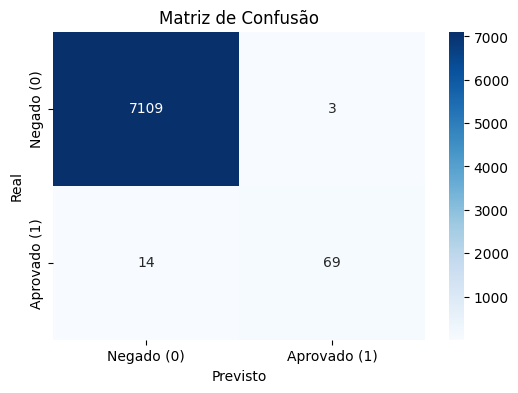

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negado (0)", "Aprovado (1)"], yticklabels=["Negado (0)", "Aprovado (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

*   O modelo de regressão logística previu que 7109 clientes seriam negados a hipoteca e eles realmente foram negados
*   O modelo de regressão logística previu que 14 clientes seriam negados a hipoteca e eles foram aprovados.
* O modelo de regressão logística fez a previsão de 3 clientes seriam aprovados, mas na realidade ele não foi.
* O modelo de regressão logística previu que o 69 clientes seriam aprovados a hipoteca e eles realmente foram aprovados.

In [ ]:
print("\nRelatório de Classificação:\n", classification_report(y_val, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7112
           1       0.96      0.83      0.89        83

    accuracy                           1.00      7195
   macro avg       0.98      0.92      0.94      7195
weighted avg       1.00      1.00      1.00      7195



Para a classe 0 (Não aprovado para hipoteca):
* Precision (1.00) → 100% das previsões de "não aprovado" ou "negado" estavam corretas.
* Recall (1.00) → O modelo encontrou todos os casos reais de "não aprovado".
* F1-score (1.00) → Como a precisão e o recall são 100%, o F1-score também é perfeito.
* Support (4743) → Existiam 7112 exemplos reais da classe "não aprovado" ou "negado" no conjunto de validação

Para a classe 1 (Aprovado para hipoteca):
* Precision (0.96) → 96% das previsões de "aprovado" estavam corretas.
* Recall (0.83) → O modelo conseguiu encontrar 83% dos casos reais de "aprovado".
* F1-score (0.89) → Combina precisão e recall, mostrando que há um pequeno problema na detecção da classe 1.
* Support (83) → Existiam apenas 83 exemplos reais da classe 1 no conjunto de validação.


#### Modelo com possíveis novos clientes

In [ ]:
reg_model = LogisticRegression()
reg_model.fit(X_train_model, y_train_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test_prob = reg_model.predict_proba(X_test_model)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_test_pred = reg_model.predict(X_test_model)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
no_mortgage = []
yes_mortgage = []
for i in y_test_pred:
  if i == 0:
    no_mortgage.append(i)
  else:
    yes_mortgage.append(i)
print("No Mortgage", len(no_mortgage))
print("Yes Mortgage", len(yes_mortgage))

No Mortgage 2745
Yes Mortgage 2


### Random Florest
O Random Forest é um modelo mais avançado baseado em múltiplas árvores de decisão. Ele faz previsões combinando várias árvores treinadas em subconjuntos diferentes dos dados, evitando possível overfitting.

#### 4 – Valide seu(s) modelo(s) utilizando o conceito de matriz de confusão. (10% da nota final).


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_model, y_train_model, test_size=0.2, random_state=42)

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model_random_forest.predict(X_val)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)

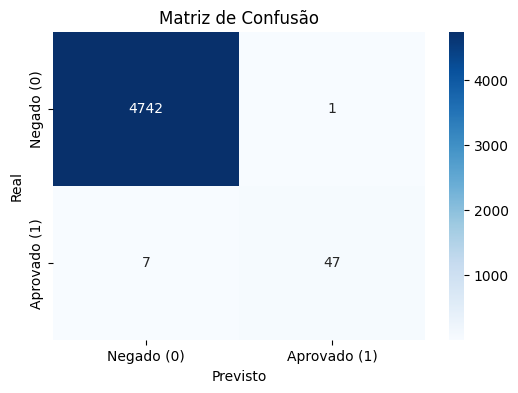

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negado (0)", "Aprovado (1)"], yticklabels=["Negado (0)", "Aprovado (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

*   O modelo de Random Forest previu que 4742 clientes seriam negados a hipoteca e eles realmente foram negados
*   O modelo de Random Forest previu que 7 clientes seriam negados a hipoteca e eles foram aprovados.
* O modelo de Random Forest fez a previsão que apenas um cliente seria aprovado, mas na realidade ele não foi.
* O modelo de Random Forest previu que o 47 clientes seriam aprovados a hipoteca e eles realmente foram aprovados.

In [ ]:
print("\nRelatório de Classificação:\n", classification_report(y_val, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4743
           1       0.98      0.87      0.92        54

    accuracy                           1.00      4797
   macro avg       0.99      0.94      0.96      4797
weighted avg       1.00      1.00      1.00      4797



Para a classe 0 (Não aprovado para hipoteca):
* Precision (1.00) → 100% das previsões de "não aprovado" ou "negado" estavam corretas.
* Recall (1.00) → O modelo encontrou todos os casos reais de "não aprovado".
* F1-score (1.00) → Como a precisão e o recall são 100%, o F1-score também é perfeito.
* Support (4743) → Existiam 4743 exemplos reais da classe "não aprovado" ou "negado" no conjunto de validação

Para a classe 1 (Aprovado para hipoteca):
* Precision (0.98) → 98% das previsões de "aprovado" estavam corretas.
* Recall (0.87) → O modelo conseguiu encontrar 87% dos casos reais de "aprovado".
* F1-score (0.92) → Combina precisão e recall, mostrando que há um pequeno problema na detecção da classe 1.
* Support (54) → Existiam apenas 54 exemplos reais da classe 1 no conjunto de validação.



#### Modelo com possíveis novos clientes

In [ ]:
rforest_model = RandomForestClassifier(n_estimators=100, random_state=42)
rforest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_prob = rforest_model.predict_proba(X_test_model)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_test_pred = rforest_model.predict(X_test_model)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
no_mortgage = []
yes_mortgage = []
for i in y_test_pred:
  if i == 0:
    no_mortgage.append(i)
  else:
    yes_mortgage.append(i)
print("No Mortgage", len(no_mortgage))
print("Yes Mortgage", len(yes_mortgage))

No Mortgage 2740
Yes Mortgage 7


### Support Vector Machine (SVM)
O SVM tenta encontrar um hiperplano ótimo que separa as classes (0 e 1) no espaço de features. Ele também pode usar funções kernel para capturar relações não lineares.

#### 4 – Valide seu(s) modelo(s) utilizando o conceito de matriz de confusão. (10% da nota final).

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_model, y_train_model, test_size=0.2, random_state=42)

In [ ]:
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = model_svm.predict(X_val)

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)

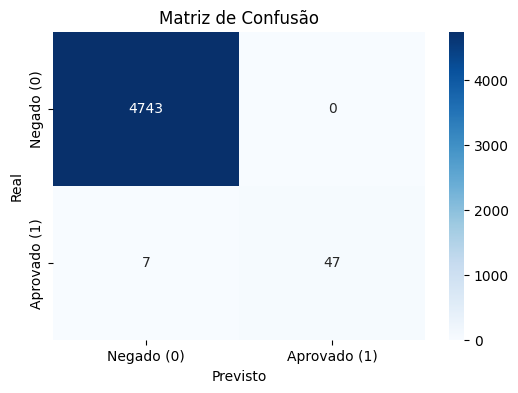

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negado (0)", "Aprovado (1)"], yticklabels=["Negado (0)", "Aprovado (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

*   O modelo SVM previu que o 4743 clientes seriam negados a hipoteca e eles realmente foram negados
*   O modelo SVM previu que 7 clientes seriam negados a hipoteca e eles foram aprovados.
* O modelo SVM não fez a previsão de falsos positivos, ou seja, ele não previu que algum cliente seria aprovado, mas na realidade ele não foi.
* O modelo SVM previu que o 47 clientes seriam aprovados a hipoteca e eles realmente foram aprovados.

In [ ]:
print("\nRelatório de Classificação:\n", classification_report(y_val, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4743
           1       1.00      0.87      0.93        54

    accuracy                           1.00      4797
   macro avg       1.00      0.94      0.96      4797
weighted avg       1.00      1.00      1.00      4797



Para a classe 0 (Não aprovado para hipoteca):
* Precision (1.00) → 100% das previsões de "não aprovado" ou "negado" estavam corretas.
* Recall (1.00) → O modelo encontrou todos os casos reais de "não aprovado".
* F1-score (1.00) → Como a precisão e o recall são 100%, o F1-score também é perfeito.
* Support (4743) → Existiam 4743 exemplos reais da classe "não aprovado" ou "negado" no conjunto de validação

Para a classe 1 (Aprovado para hipoteca):
* Precision (1.00) → 100% das previsões de "aprovado" estavam corretas.
* Recall (0.87) → O modelo conseguiu encontrar 87% dos casos reais de "aprovado".
* F1-score (0.93) → Combina precisão e recall, mostrando que há um pequeno problema na detecção da classe 1.
* Support (54) → Existiam apenas 54 exemplos reais da classe 1 no conjunto de validação.



#### Modelo para possíveis novos clientes

In [ ]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_test_prob = svm_model.predict_proba(X_test_model)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
y_test_pred = svm_model.predict(X_test_model)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
no_mortgage = []
yes_mortgage = []
for i in y_test_pred:
  if i == 0:
    no_mortgage.append(i)
  else:
    yes_mortgage.append(i)
print("No Mortgage", len(no_mortgage))
print("Yes Mortgage", len(yes_mortgage))

No Mortgage 2742
Yes Mortgage 5
